<a href="https://colab.research.google.com/github/19z/pytorch-deep-learning/blob/main/extras/pytorch_most_common_errors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="在 Colab 中打开"/></a>

# PyTorch 中最常见的三种错误

PyTorch 是当前可用的最大的机器学习库之一。

因此，在使用它时，你很可能会遇到各种错误。

由于库的创建者进行了各种维护和检查，因此错误很少是因为库本身的问题。

这意味着你遇到的大多数错误都是用户错误。

更具体地说，你写错了代码。

不要觉得被冒犯，每个程序员都会遇到这种情况。

在用户错误中，很可能是以下三种之一：

1. **形状错误** - 你试图对形状不匹配的矩阵/张量执行操作。例如，你的数据形状是 `[1, 28, 28]`，但你的第一层输入形状是 `[10]`。
2. **设备错误** - 你的模型和数据位于不同的设备上。例如，你的模型在 GPU 上（例如 `"cuda"`），而你的数据在 CPU 上（例如 `"cpu"`）。
3. **数据类型错误** - 你的数据是一种数据类型（例如 `torch.float32`），但你要执行的操作需要另一种数据类型（例如 `torch.int64`）。

<img src="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/images/misc-three-main-errors-in-pytorch.png" width=750 alt="PyTorch 中最常见的三种错误"/>

注意这里的重复主题。

你的形状、设备和/或数据类型之间存在某种不匹配。

本笔记本/博客文章将通过示例介绍上述每种错误及其解决方法。

虽然这不会阻止你将来犯这些错误，但它会让你足够意识到这些错误，从而减少它们，更重要的是，知道如何解决它们。

> **注意：** 以下所有示例均改编自 [learnpytorch.io](https://learnpytorch.io)，这是 [Zero to Mastery: PyTorch for Deep Learning](https://dbourke.link/ZTMPyTorch) 视频课程的书籍版本。

## 1. PyTorch中的形状错误

### 1.1 矩阵乘法的形状错误

PyTorch 是构建神经网络模型的最佳框架之一。

神经网络的基本操作之一就是矩阵乘法。

然而，矩阵乘法有非常具体的规定。

如果不遵守这些规则，你会遇到著名的形状错误。

```
RuntimeError: mat1 和 mat2 的形状无法相乘 (3x4 和 3x4)
```

让我们从一个简短的例子开始。

> **注意：** 尽管它被称为“矩阵乘法”，但 PyTorch 中的几乎所有数据形式都是以张量的形式出现的。张量是一个 n 维数组（n 可以是任何数字）。因此，虽然我使用“矩阵乘法”这个术语，但这同样适用于“张量乘法”。有关矩阵和张量之间差异的更多信息，请参阅 [00. PyTorch 基础：张量介绍](https://www.learnpytorch.io/00_pytorch_fundamentals/#introduction-to-tensors)。

In [1]:
import torch
print(f"PyTorch version: {torch.__version__}")

PyTorch version: 1.12.1+cu113


In [2]:
# Create two tensors
tensor_1 = torch.rand(3, 4)
tensor_2 = torch.rand(3, 4)

# Check the shapes
print(tensor_1.shape)
print(tensor_2.shape)

torch.Size([3, 4])
torch.Size([3, 4])


请注意，这两个张量的形状是相同的。

让我们尝试对它们进行矩阵乘法运算。

> **注意：** 矩阵乘法运算与标准乘法运算不同。
>
> 对于我们当前的张量，标准乘法运算（`*` 或 [`torch.mul()`](https://pytorch.org/docs/stable/generated/torch.mul.html)）可以正常工作，而矩阵乘法运算（`@` 或 [`torch.matmul()`](https://pytorch.org/docs/stable/generated/torch.matmul.html)）将会报错。
>
> 有关矩阵乘法运算的详细解释，请参阅 [00. PyTorch 基础：矩阵乘法](https://www.learnpytorch.io/00_pytorch_fundamentals/#matrix-multiplication-is-all-you-need)。

In [3]:
# Standard multiplication, the following lines perform the same operation (will work)
tensor_3 = tensor_1 * tensor_2 # can do standard multiplication with "*"
tensor_4 = torch.mul(tensor_1, tensor_2) # can also do standard multiplicaton with "torch.mul()" 

# Check for equality 
tensor_3 == tensor_4

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

太棒了！看起来标准乘法在我们当前的张量形状下运行良好。

接下来让我们尝试矩阵乘法。

In [4]:
# Try matrix multiplication (won't work)
tensor_5 = tensor_1 @ tensor_2 # could also do "torch.matmul(tensor_1, tensor_2)"

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x4 and 3x4)

糟糕！

我们遇到了类似以下的错误：

```
RuntimeError                              Traceback (most recent call last)
<ipython-input-11-2ca2c90dbb42> in <module>
      1 # 尝试矩阵乘法（不工作）
----> 2 tensor_5 = tensor_1 @ tensor_2

RuntimeError: mat1 和 mat2 的形状无法相乘（3x4 和 3x4）
```

这是一个**形状错误**，我们的两个张量（矩阵）无法进行*矩阵*乘法，因为它们的形状不兼容。

为什么？

这是因为矩阵乘法有特定的规则：

1. **内维度**必须匹配：
* `(3, 4) @ (3, 4)` 不工作
* `(4, 3) @ (3, 4)` 工作
* `(3, 4) @ (4, 3)` 工作
2. 结果矩阵的形状是**外维度**：
* `(4, 3) @ (3, 4)` -> `(4, 4)`
* `(3, 4) @ (4, 3)` -> `(3, 3)`

那么我们如何解决这个问题呢？

这时就需要用到*转置*或*重塑*操作。

在神经网络的情况下，更普遍的是转置操作。

* **转置** - 转置（[`torch.transpose()`](https://pytorch.org/docs/stable/generated/torch.transpose.html)）操作交换给定张量的维度。
  * **注意：** 你也可以使用 `tensor.T` 的快捷方式来进行转置。
* **重塑** - 重塑（[`torch.reshape()`](https://pytorch.org/docs/stable/generated/torch.reshape.html)）操作返回一个具有相同原始元素但形状不同的张量。

让我们看看实际操作。

In [5]:
# Perform a transpose on tensor_1 and then perform matrix multiplication 
tensor_6 = tensor_1.T @ tensor_2
print(f"Shape of input tensors: {tensor_1.T.shape} and {tensor_2.shape}")
print(f"Shape of output tensor: {tensor_6.shape}")

Shape of input tensors: torch.Size([4, 3]) and torch.Size([3, 4])
Shape of output tensor: torch.Size([4, 4])


没有错误！

注意到由于转置操作（`tensor_1.T`），`tensor_1`的输入形状从 `(3, 4)` 变为了 `(4, 3)`。

正因为如此，矩阵乘法的规则1，**内维度必须匹配**，得到了满足。

最后，输出形状满足了矩阵乘法的规则2，**结果矩阵的形状为外维度**。

在我们的例子中，`tensor_6` 的形状为 `(4, 4)`。

让我们进行同样的操作，只不过这次我们将转置 `tensor_2` 而不是 `tensor_1`。

In [6]:
# Perform a transpose on tensor_2 and then perform matrix multiplication
tensor_7 = tensor_1 @ tensor_2.T
print(f"Shape of input tensors: {tensor_1.shape} and {tensor_2.T.shape}")
print(f"Shape of output tensor: {tensor_7.shape}")

Shape of input tensors: torch.Size([3, 4]) and torch.Size([4, 3])
Shape of output tensor: torch.Size([3, 3])


哇哦！

再次没有错误！

看看矩阵乘法的规则1和规则2是如何再次得到满足的。

只不过这次因为我们转置了`tensor_2`，所以得到的输出张量形状是`(3, 3)`。

好消息是，大多数时候，当你使用PyTorch构建神经网络时，这个库会为你处理大部分你需要执行的矩阵乘法操作。

话虽如此，让我们用PyTorch构建一个神经网络，看看形状错误可能会出现在哪里。

### 1.2 PyTorch神经网络形状错误

我们已经了解了在使用矩阵乘法（或矩阵乘以张量）时可能出现的形状错误。

现在，让我们构建一个PyTorch神经网络，看看形状错误可能出现在哪些地方。

在以下任一情况下，神经网络中会出现形状错误：
* **输入形状不正确** - 您的数据具有某种形状，但模型的第一层期望不同的形状。
* **层与层之间的输入和输出形状不匹配** - 模型中的某一层输出某种形状，但下一层期望不同的输入形状。
* **在进行预测时输入数据中没有批次大小维度** - 您的模型在具有批次维度的样本上进行训练，因此当您尝试在没有批次维度的单个样本上进行预测时，会出现错误。

为了展示这些形状错误，让我们构建一个简单的神经网络（无论网络大小如何，错误都是相同的），尝试在Fashion MNIST数据集（10种不同类别的服装的黑白图像）中寻找模式。

> **注意：** 以下示例特别关注形状错误，而不是构建*最佳*神经网络。您可以在[03. PyTorch计算机视觉](https://www.learnpytorch.io/03_pytorch_computer_vision/)中看到这个问题的完整工作示例。

### 1.3 下载数据集

首先，我们将从 [`torchvision.datasets`](https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html) 获取 Fashion MNIST 数据集。

In [7]:
import torchvision
from torchvision import datasets, transforms

# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=transforms.ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=transforms.ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



现在让我们获取一些关于第一个训练样本的详细信息，包括标签、类别名称和类别数量。

In [8]:
# See first training sample
image, label = train_data[0]
print(f"Image shape: {image.shape} -> [batch, height, width]") 
print(f"Label: {label}") # label is an int rather than a tensor (it has no shape attribute)

Image shape: torch.Size([1, 28, 28]) -> [batch, height, width]
Label: 9


我们的图像形状为 `[1, 28, 28]` 或 `[batch_size, height, width]`。

In [9]:
# See class names and number of classes
class_names = train_data.classes
num_classes = len(class_names)
class_names, num_classes

(['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'],
 10)

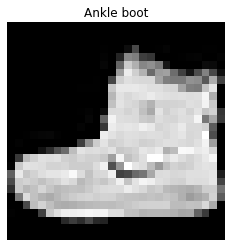

In [10]:
# Plot a sample
import matplotlib.pyplot as plt
plt.imshow(image.squeeze(), cmap="gray") # plot image as grayscale
plt.axis(False)
plt.title(class_names[label]);

### 1.4 构建具有不同形状错误的神经网络系列

我们的问题是：构建一个能够识别服装灰度图像中模式的神经网络。

这个陈述可以非常深入，因为“哪种神经网络最好？”是整个机器学习领域的主要研究问题之一。

但让我们尽可能简单地开始，以展示不同的错误类型。

我们将使用PyTorch构建几个两层的神经网络，每个网络展示一种不同的错误：

| **模型编号** | **层** | **错误展示** | 
| ----- | ----- | ----- |
| 0 | 2个带有10个隐藏单元的`nn.Linear()` | 输入形状错误 |
| 1 | 与模型1相同 + 1个`nn.Flatten()` | 输入形状错误（仍然） |
| 2 | 1个`nn.Flatten()`，1个具有正确输入形状的`nn.Linear()`和1个带有10个隐藏单元的`nn.Linear()` | 无（输入形状正确） |
| 3 | 与模型2相同，但`nn.Linear()`层之间的形状不同 | 层之间形状错误 |
| 4 | 与模型3相同，但最后一层替换为`nn.LazyLinear()` | 无（展示`nn.LazyX()`层如何推断正确形状） |
| 5 | 与模型4相同，但所有`nn.Linear()`替换为`nn.LazyLinear()` | 无（展示`nn.LazyX()`层如何推断正确形状） |

### 1.5 输入层形状错误

我们将从一个包含两个 [`nn.Linear()`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) 层的网络开始，每个层有 10 个隐藏单元。

> **注意：** 关于 `nn.Linear()` 内部的工作原理，请参阅 [01. PyTorch 工作流程第 6 节：综合应用](https://www.learnpytorch.io/01_pytorch_workflow/#6-putting-it-all-together)。

然后，我们将把 `image` 传递给这个网络，看看会发生什么。

In [11]:
from torch import nn

# Create a two layer neural network
model_0 = nn.Sequential(
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=10)
)

# Pass the image through the model (this will error)
model_0(image)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (28x28 and 10x10)

运行上述代码后，我们遇到了另一个形状错误！

类似于：

```
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/linear.py in forward(self, input)
    112 
    113     def forward(self, input: Tensor) -> Tensor:
--> 114         return F.linear(input, self.weight, self.bias)
    115 
    116     def extra_repr(self) -> str:

RuntimeError: mat1 and mat2 shapes cannot be multiplied (28x28 and 10x10)
```

关键在于最后一行 `RuntimeError: mat1 and mat2 shapes cannot be multiplied (28x28 and 10x10)`。

这告诉我们数据形状有问题。

因为在幕后，`nn.Linear()` 试图进行矩阵乘法。

我们该如何解决这个问题？

有几种不同的选项，具体取决于你使用的是哪种层。

但由于我们使用的是 `nn.Linear()` 层，让我们专注于这一点。

`nn.Linear()` 喜欢接受单维向量的数据。

例如，输入 `image` 的形状为 `[1, 28, 28]`，它更喜欢 `[1, 784]`（`784 = 28*28`）。

换句话说，它希望所有信息都被*展平*成单一维度。

我们可以使用 PyTorch 的 [`nn.Flatten()`](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html) 来实现这种展平。

让我们看看它是如何发生的。

In [12]:
# Create a flatten layer
flatten = nn.Flatten()

# Pass the image through the flatten layer
flattened_image = flatten(image)

# Print out the image shape before and after 
print(f"Before flatten shape: {image.shape} -> [batch, height, width]")
print(f"After flatten shape: {flattened_image.shape} -> [batch, height*width]")

Before flatten shape: torch.Size([1, 28, 28]) -> [batch, height, width]
After flatten shape: torch.Size([1, 784]) -> [batch, height*width]


太好了，图像数据已经展平了！

现在让我们尝试在我们的现有模型中添加 `nn.Flatten()` 层。

In [13]:
# Replicate model_0 except add a nn.Flatten() layer to begin with 
model_1 = nn.Sequential(
    nn.Flatten(), # <-- NEW: add nn.Flatten() layer
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=10)
)

# Pass the image through the model
model_1(image)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x784 and 10x10)

哎呀！

又出错了...

错误信息如下：

```
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/linear.py in forward(self, input)
    112 
    113     def forward(self, input: Tensor) -> Tensor:
--> 114         return F.linear(input, self.weight, self.bias)
    115 
    116     def extra_repr(self) -> str:

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x784 and 10x10)
```

同样，关键信息在最后一行。

`RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x784 and 10x10)`

嗯，我们知道 `(1x784)` 肯定来自我们的输入数据（`image`），因为我们已经将其从 `(1, 28, 28)` 展平为 `(1, 784)`。

那么 `(10x10)` 呢？

这些值来自我们在 `nn.Linear()` 层中设置的参数，`in_features=10` 和 `out_features=10` 或者 `nn.Linear(in_features=10, out_features=10)`。

矩阵乘法的第一条规则是什么来着？

1. **内维**必须匹配。

对！

那么如果我们把第一层的 `in_features=10` 改为 `in_features=784` 会发生什么？

让我们试试看！

In [14]:
# Flatten the input as well as make sure the first layer can accept the flattened input shape
model_2 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(in_features=784, out_features=10), # <-- NEW: change in_features=10 to in_features=784
    nn.Linear(in_features=10, out_features=10)
)

# Pass the image through the model
model_2(image)

tensor([[-0.2045,  0.2677, -0.0713, -0.3096, -0.0586,  0.3153, -0.3413,  0.2031,
          0.4421,  0.1715]], grad_fn=<AddmmBackward0>)

成功了！

我们从模型中得到了输出！

虽然这个输出目前可能没有太多意义，但至少我们知道所有形状都匹配，数据能够完全流经我们的模型。

`nn.Flatten()` 层将我们的输入图像从 `(1, 28, 28)` 转换为 `(1, 784)`，而我们的第一个 `nn.Linear(in_features=784, out_features=10)` 层能够将其作为输入。

### 1.6 隐藏层输入和输出形状不匹配

如果我们的输入层具有正确的形状，但连接的层之间存在不匹配会怎样？

例如，第一个 `nn.Linear()` 的 `out_features=10`，但下一个 `nn.Linear()` 的 `in_features=5`。

这就是**层之间输入和输出形状不匹配**的例子。

In [15]:
# Create a model with incorrect input and output shapes between layers
model_3 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(in_features=784, out_features=10), # out_features=10 
    nn.Linear(in_features=5, out_features=10) # <-- NEW: in_features does not match the out_features of the previous layer
)

# Pass the image through the model (this will error)
model_3(image)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x10 and 5x10)

运行上述模型时，我们遇到了以下错误：

```
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/linear.py in forward(self, input)
    112 
    113     def forward(self, input: Tensor) -> Tensor:
--> 114         return F.linear(input, self.weight, self.bias)
    115 
    116     def extra_repr(self) -> str:

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x10 and 5x10)
```

再次违反了矩阵乘法的规则1，即**内维**必须匹配。

我们的第一个 `nn.Linear()` 层输出形状为 `(1, 10)`，但我们的第二个 `nn.Linear()` 层期望的形状是 `(1, 5)`。

我们该如何解决这个问题呢？

我们可以手动将第二个 `nn.Linear()` 层的 `in_features` 设置为 10，或者尝试使用 PyTorch 的较新特性——“惰性”层。

### 1.7 PyTorch 惰性层（自动推断输入形状）

PyTorch 中的惰性层通常以 `nn.LazyX` 的形式出现，其中 `X` 是现有非惰性层的对应形式。

例如，`nn.Linear()` 的惰性等效层是 [`nn.LazyLinear()`](https://pytorch.org/docs/stable/generated/torch.nn.LazyLinear.html)。

`Lazy` 层的主要特点是能够*推断* `in_features` 或从前一层的输入形状。

> **注意：** 截至 2022 年 11 月，PyTorch 中的 `Lazy` 层仍处于实验阶段，可能会发生变化，但它们的用法应该与下面的示例不会有太大差异。

例如，如果前一层的 `out_features=10`，那么后续的 `Lazy` 层应该推断出 `in_features=10`。

让我们测试一下。

In [16]:
# Try nn.LazyLinear() as the second layer
model_4 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(in_features=784, out_features=10),
    nn.LazyLinear(out_features=10) # <-- NEW: no in_features parameter as this is inferred from the previous layer's output
)

# Pass the image through the model
model_4(image)

/home/daniel/code/pytorch/env/lib/python3.8/site-packages/torch/nn/modules/lazy.py:178: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


tensor([[ 0.4282,  0.2492, -0.2045, -0.4943, -0.1639,  0.1166,  0.3828, -0.1283,
         -0.1771, -0.2277]], grad_fn=<AddmmBackward0>)

这可以正常工作（不过根据你使用的 PyTorch 版本，可能会有一条警告信息，如果是这样，不用担心，这只是表明 `Lazy` 层仍在开发中）！

我们试试把所有的 `nn.Linear()` 层替换成 `nn.LazyLinear()` 层怎么样？

这样我们只需要为每个层设置 `out_features` 值即可。

In [18]:
# Replace all nn.Linear() layers with nn.LazyLinear()
model_5 = nn.Sequential(
    nn.Flatten(),
    nn.LazyLinear(out_features=10),
    nn.LazyLinear(out_features=10) # <-- NEW 
)

# Pass the image through the model
model_5(image)

tensor([[ 0.1375, -0.2175, -0.1054,  0.1424, -0.1406, -0.1180, -0.0896, -0.4285,
         -0.0077, -0.3188]], grad_fn=<AddmmBackward0>)

太好了！

我们的图像再次顺利通过网络，没有任何问题。

> **注意：** 上述示例仅涉及 PyTorch 中的一种层类型 `nn.Linear()`，然而，无论是在所有神经网络还是不同类型的数据中，确保输入和输出形状与每一层相匹配的原则是一致的。
>
> 例如，卷积神经网络 (CNN) 中使用的 [`nn.Conv2d()`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) 层甚至可以接受不需要使用 `nn.Flatten()` 的输入。你可以在 [03. PyTorch 计算机视觉 第7节：构建一个 CNN](https://www.learnpytorch.io/03_pytorch_computer_vision/#7-model-2-building-a-convolutional-neural-network-cnn) 中了解更多相关信息。

## 2. PyTorch 中的设备错误

PyTorch 的主要优势之一是其内置的能够在 GPU（图形处理单元）上进行计算的能力。

GPU 通常能够比 CPU（中央处理单元）更快地执行操作，特别是矩阵乘法（这是构成神经网络的大部分操作）。

如果你使用的是原生 PyTorch（没有其他外部库），PyTorch 要求你明确设置在哪个设备上进行计算。

例如，要将模型发送到目标设备，你可以使用 [`to()`](https://pytorch.org/docs/stable/generated/torch.Tensor.to.html) 方法，例如 `model.to(device)`。

同样地，对于数据 `some_dataset.to(device)`。

**设备错误** 发生在模型和数据位于不同设备上时。

例如，当你将模型发送到目标 GPU 设备，但数据仍然在 CPU 上时。

### 2.1 设置目标设备

让我们将当前设备设置为 `"cuda"`（如果可用）。

> **注意：** 有关如何获取 GPU 并使用 PyTorch 进行设置的更多信息，请参阅 [00. PyTorch 基础：在 GPU 上运行张量](https://www.learnpytorch.io/00_pytorch_fundamentals/#running-tensors-on-gpus-and-making-faster-computations)。

In [19]:
import torch

# Set device to "cuda" if it's available otherwise default to "cpu"
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Current device: {device}")

Current device: cuda


现在让我们创建一个与 `model_5` 具有相同层的模型。

在 PyTorch 中，模型和张量默认是在 CPU 上创建的。

我们可以通过检查我们创建的模型的 `device` 属性来测试这一点。

In [20]:
from torch import nn

# Create a model (similar to model_5 above)
model_6 = nn.Sequential(
    nn.Flatten(),
    nn.LazyLinear(out_features=10), 
    nn.LazyLinear(out_features=10)
)

# All models and tensors are created on the CPU by default (unless explicitly set otherwise)
print(f"Model is on device: {next(model_6.parameters()).device}")

Model is on device: cpu


### 2.2 为建模准备数据

为了准备数据进行建模，我们来创建一些 PyTorch 的 `DataLoader`。

为了加快速度，我们将使用 [`torch.utils.data.RandomSampler`](https://pytorch.org/docs/stable/data.html#torch.utils.data.RandomSampler) 实例来随机选择训练和测试样本的 10%（我们并不太关心性能最佳的模型，而是更关注展示潜在的错误）。

我们还将设置一个损失函数 `torch.nn.CrossEntropyLoss()` 和一个优化器 `torch.optim.SGD(lr=0.01)`。

> **注意：** 有关为训练 PyTorch 模型准备数据、损失函数和优化器的更多信息，请参阅 [01. PyTorch 工作流程基础 第3节：训练模型](https://www.learnpytorch.io/01_pytorch_workflow/#3-train-model)。

In [21]:
from torch.utils.data import DataLoader, RandomSampler

# Only sample 10% of the data
train_sampler = RandomSampler(train_data, 
                              num_samples=int(0.1*len(train_data)))

test_sampler = RandomSampler(test_data, 
                             num_samples=int(0.1*len(test_data)))

print(f"Number of random training samples selected: {len(train_sampler)}/{len(train_data)}")
print(f"Number of random testing samples selected: {len(test_sampler)}/{len(test_data)}")

# Create DataLoaders and turn data into batches
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              sampler=train_sampler)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             sampler=test_sampler)

print(f"Number of batches in train_dataloader: {len(train_dataloader)} batches of size {BATCH_SIZE}")
print(f"Number of batches in test_dataloader: {len(test_dataloader)} batch of size {BATCH_SIZE}")

# Create loss function
loss_fn = nn.CrossEntropyLoss()

# Create optimizer
optimizer = torch.optim.SGD(lr=0.01, 
                            params=model_6.parameters())

Number of random training samples selected: 6000/60000
Number of random testing samples selected: 1000/10000
Number of batches in train_dataloader: 188 batches of size 32
Number of batches in test_dataloader: 32 batch of size 32


### 2.3 在CPU上训练模型

数据准备好了，模型也准备好了，让我们开始训练吧！

我们将使用标准的PyTorch训练循环，对`model_6`进行五轮训练，使用10%的数据。

在这里不必过于担心损失值是否尽可能低，因为我们更关注的是确保没有错误，而不是追求最低可能的损失值。

<img src="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/images/01-pytorch-training-loop-annotated.png" alt="PyTorch训练循环步骤注解" width=750/>

> **注意：** 有关PyTorch训练循环步骤的更多信息，请参阅[01. PyTorch工作流程第3节：PyTorch训练循环](https://www.learnpytorch.io/01_pytorch_workflow/#pytorch-training-loop)。

In [22]:
from tqdm.auto import tqdm

# Set the number of epochs
epochs = 5

# Train the model
for epoch in tqdm(range(epochs)):

    # Set loss to 0 every epoch
    train_loss = 0

    # Get images (X) and labels (y)
    for X, y in train_dataloader:

        # Forward pass
        y_pred = model_6(X)

        # Calculate the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss

        # Optimizer zero grad
        optimizer.zero_grad()

        # Loss backward
        loss.backward()

        # Optimizer step
        optimizer.step()
  
    # Print loss in the epoch loop only
    print(f"Epoch: {epoch} | Training loss: {train_loss:.2f}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Training loss: 334.65
Epoch: 1 | Training loss: 215.44
Epoch: 2 | Training loss: 171.15
Epoch: 3 | Training loss: 154.72
Epoch: 4 | Training loss: 142.22


太好了！看来我们的训练循环运行正常！

我们模型的损失正在下降（损失越低越好）。

### 2.4 尝试在GPU上训练模型（含错误）

现在，让我们将 `model_6` 发送到目标 `device`（在我们的例子中，这是一个 `"cuda"` GPU）。

In [23]:
# Send model_6 to the target device ("cuda")
model_6.to(device)

# Print out what device the model is on
print(f"Model is on device: {next(model_6.parameters()).device}")

Model is on device: cuda:0


我们的 `model_6` 位于 `"cuda:0"` 设备上（其中 `0` 是设备的索引，以防有多块 GPU）。

现在，让我们运行与上面相同的训练循环代码，看看会发生什么。

你能猜到吗？

In [24]:
from tqdm.auto import tqdm

# Set the number of epochs
epochs = 5

# Train the model
for epoch in tqdm(range(epochs)):

  # Set loss to 0 every epoch
  train_loss = 0

  # Get images (X) and labels (y)
  for X, y in train_dataloader:

    # Forward pass
    y_pred = model_6(X) # model is on GPU, data is on CPU (will error)

    # Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss
    
    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    # Optimizer step
    optimizer.step()
  
  # Print loss in the epoch loop only
  print(f"Epoch: {epoch} | Training loss: {train_loss:.2f}")

  0%|          | 0/5 [00:00<?, ?it/s]

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_addmm)

哎呀！

看起来我们遇到了一个设备错误：

```
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/linear.py in forward(self, input)
    112 
    113     def forward(self, input: Tensor) -> Tensor:
--> 114         return F.linear(input, self.weight, self.bias)
    115 
    116     def extra_repr(self) -> str:

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_addmm)
```

我们可以看到错误信息指出：`Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!`。

本质上，我们的模型位于 `cuda:0` 设备上，但我们的数据张量（`X` 和 `y`）仍然在 `cpu` 设备上。

但 **PyTorch 期望 *所有* 张量都在同一设备上**。

### 2.5 在GPU上训练模型（无错误）

让我们解决这个错误，将数据张量（`X`和`y`）也发送到目标`device`。

我们可以通过使用`X.to(device)`和`y.to(device)`来实现这一点。

In [25]:
# Send the model to the target device (we don't need to do this again but we will for completeness)
model_6.to(device)

# Set the number of epochs
epochs = 5

# Train the model
for epoch in tqdm(range(epochs)):

  # Set loss to 0 every epoch
  train_loss = 0

  # Get images (X) and labels (y)
  for X, y in train_dataloader:

    # Put target data on target device  <-- NEW
    X, y = X.to(device), y.to(device) # <-- NEW: send data to target device

    # Forward pass
    y_pred = model_6(X)

    # Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss
    
    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    # Optimizer step
    optimizer.step()
  
  # Print loss in the epoch loop only
  print(f"Epoch: {epoch} | Training loss: {train_loss:.2f}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Training loss: 134.76
Epoch: 1 | Training loss: 127.76
Epoch: 2 | Training loss: 120.85
Epoch: 3 | Training loss: 120.50
Epoch: 4 | Training loss: 116.29


非常好！

我们的训练循环与之前一样完成，因为现在我们的模型和数据张量都在同一设备上。

> **注意：** 像 [HuggingFace Accelerate](https://github.com/huggingface/accelerate) 这样的库是使用 PyTorch 模型进行训练的绝佳方式，几乎不需要显式设置设备（它们会自动发现最佳设备并为您设置好一切）。
> 
> 您也可以编写函数来确保您的训练代码都在同一设备上运行，更多内容请参阅 [05. PyTorch 模块化进阶 第4节：创建训练函数](https://www.learnpytorch.io/05_pytorch_going_modular/#4-creating-train_step-and-test_step-functions-and-train-to-combine-them)。

### 2.6 在预测时出现的设备错误

我们在训练过程中已经见过设备错误，但同样的错误也可能在测试或推理（进行预测）时发生。

训练模型并在某些数据上进行训练的整个想法是为了利用它对*未见过的*数据进行预测。

让我们使用训练好的 `model_6`，并利用它对测试数据集中的一个样本进行预测。

In [26]:
# Get a single sample from the test dataset
test_image, test_label = test_data.data[0], test_data.targets[0]
print(f"Test image shape: {test_image.shape}")
print(f"Test image label: {test_label}")

Test image shape: torch.Size([28, 28])
Test image label: 9


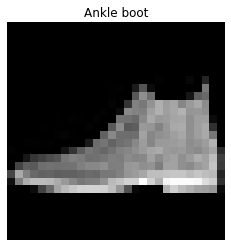

In [27]:
# Plot test image
import matplotlib.pyplot as plt
plt.imshow(test_image, cmap="gray")
plt.axis(False)
plt.title(class_names[test_label]);

看起来不错！

现在让我们尝试通过将其传递给我们的 `model_6` 来进行预测。

In [28]:
# Pass the test image through model_6 to make a prediction
model_6(test_image)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_addmm)

该死！

我们又遇到了设备错误。

```
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/linear.py in forward(self, input)
    112 
    113     def forward(self, input: Tensor) -> Tensor:
--> 114         return F.linear(input, self.weight, self.bias)
    115 
    116     def extra_repr(self) -> str:

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_addmm)
```

这是因为我们的 `model_6` 位于 GPU（即 `"cuda"`）上，而我们的 `test_image` 位于 CPU 上（在 PyTorch 中，所有张量默认位于 CPU 上）。

让我们将 `test_image` 发送到目标 `device`，然后再尝试进行预测。

In [30]:
# Send test_image to target device
model_6(test_image.to(device))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (28x28 and 784x10)

糟糕！又是错误...

```
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/linear.py in forward(self, input)
    112 
    113     def forward(self, input: Tensor) -> Tensor:
--> 114         return F.linear(input, self.weight, self.bias)
    115 
    116     def extra_repr(self) -> str:

RuntimeError: mat1 and mat2 shapes cannot be multiplied (28x28 and 784x10)
```

这次是形状错误。

我们之前也遇到过这种情况。

我们的 `test_image` 形状出了什么问题？

也许是因为我们的模型是在带有批次维度的图像上训练的？

而我们当前的 `test_image` 没有批次维度？

这里有一个有用的经验法则需要记住：**训练好的模型喜欢预测与它们训练时相同格式和形状的数据**。

这意味着，如果我们的模型是在带有批次维度的图像上训练的，它倾向于喜欢预测带有批次维度的图像，即使批次维度只有1（单个样本）。

如果我们的模型是在 `torch.float32` 格式（或其他格式）的数据上训练的，它也会喜欢预测相同格式的数据（我们稍后会看到这一点）。

我们可以使用 [`torch.unsqueeze()`](https://pytorch.org/docs/stable/generated/torch.unsqueeze.html) 方法为我们的 `test_image` 添加一个单一批次维度。

In [31]:
# Changing the input size to be the same as what the model was trained on
original_input_shape = test_image.shape
updated_input_shape = test_image.unsqueeze(dim=0).shape # adding a batch dimension on the "0th" dimension

# Print out shapes of original tensor and updated tensor
print(f"Original input data shape: {original_input_shape} -> [height, width]")
print(f"Updated input data shape (with added batch dimension): {updated_input_shape} -> [batch, height, width]")

Original input data shape: torch.Size([28, 28]) -> [height, width]
Updated input data shape (with added batch dimension): torch.Size([1, 28, 28]) -> [batch, height, width]


太好了！

我们已经找到了一种方法来为我们的 `test_image` 添加批处理维度。

现在让我们再尝试对它进行一次预测。

In [32]:
# Make prediction on test image with additional batch size dimension and with it on the target device
model_6(test_image.unsqueeze(dim=0).to(device))

RuntimeError: expected scalar type Float but found Byte

什么？

又出错了！

这次是数据类型错误：

```
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/linear.py in forward(self, input)
    112 
    113     def forward(self, input: Tensor) -> Tensor:
--> 114         return F.linear(input, self.weight, self.bias)
    115 
    116     def extra_repr(self) -> str:

RuntimeError: expected scalar type Float but found Byte
```

我们遇到了 PyTorch 中第三常见的错误——数据类型错误。

让我们在下一节中探讨如何修复它们。

## 3. PyTorch 中的数据类型错误

回顾一下经验法则：**训练好的模型喜欢预测与它们训练时形状和格式相同的数据**。

看起来我们的模型期望一个 `Float` 数据类型，但我们的 `test_image` 是 `Byte` 数据类型。

我们可以通过之前的错误信息中的最后一行得知这一点：

```
RuntimeError: expected scalar type Float but found Byte
```

为什么会这样？

这是因为我们的 `model_6` 是在 `Float` 格式的数据样本上训练的，具体来说，是 `torch.float32`。

我们怎么知道这一点？

嗯，`torch.float32` 是 PyTorch 中许多张量的默认值，除非明确设置为其他类型。

但让我们检查一下以确保。

### 3.1 检查模型训练数据的类型

我们可以通过查看 `train_dataloader` 中样本的 `dtype` 属性来检查模型训练数据的类型。

In [33]:
# Get a single sample from the train_dataloader and print the dtype
train_image_batch, train_label_batch = next(iter(train_dataloader))
train_image_single, train_label_single = train_image_batch[0], train_label_batch[0]

# Print the datatype of the train_image_single
print(f"Datatype of training data: {train_image_single.dtype}")

Datatype of training data: torch.float32


好了，我们确认了训练数据样本是 `torch.float32` 类型的。

因此，我们的 `model_6` 希望在这个数据类型上进行预测是合理的。

但我们的训练数据是如何变成这个数据类型的呢？

这发生在第 1.3 节，当我们下载 Fashion MNIST 数据集并使用 [`torchvision.transforms.ToTensor()`](https://pytorch.org/vision/stable/generated/torchvision.transforms.ToTensor.html) 的 `transform` 参数时。

这个 `transform` 会将传递给它的任何数据转换为 `torch.Tensor`，并使用默认的数据类型 `torch.float32`。

因此，另一个经验法则是：**在进行预测时，无论对训练数据执行了哪些转换，都应该对测试数据执行相同的转换**。

### 3.2 改变张量的数据类型

在我们的例子中，我们可以创建一个独立的变换来转换我们的测试数据，但我们也可以使用 `tensor.type(some_type_here)` 来改变目标张量的数据类型，例如 `tensor_1.type(torch.float32)`。

让我们试一试。

In [34]:
# Print out the original datatype of test_image
print(f"Original datatype: {test_image.unsqueeze(dim=0).dtype}")

# Change the datatype of test_image and see the change
print(f"Changing the datatype: {test_image.unsqueeze(dim=0).type(torch.float32).dtype}")

Original datatype: torch.uint8
Changing the datatype: torch.float32


### 3.3 对测试图像进行预测并确保其格式正确

好了，看起来我们已经准备好了所有的拼图碎片：形状、设备和数据类型，让我们尝试进行一次预测吧！

> **注意：** 记住模型喜欢在与其训练数据相同（或相似）格式的数据上进行预测（形状、设备和数据类型）。

In [35]:
# Make a prediction with model_6 on the transformed test_image
pred_on_gpu = model_6(test_image.unsqueeze(dim=0) # add a batch dimension
                      .type(torch.float32) # convert the datatype to torch.float32
                      .to(device)) # send the tensor to the target device
pred_on_gpu

tensor([[ -963.8352, -1658.8182,  -735.9952, -1285.2964,  -550.3845,   949.4190,
          -538.1960,  1123.0616,   552.7371,  1413.8110]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

哇呼！！！

虽然步骤不少，但我们的 `model_6` 成功对 `test_image` 进行了预测。

由于 `test_image` 默认位于 CPU 上，我们也可以使用 [`.cpu()` 方法](https://pytorch.org/docs/stable/generated/torch.Tensor.cpu.html) 将模型放回 CPU，并在 CPU 设备上进行相同的预测，而不是在 GPU 设备上。

In [36]:
# Put model back on CPU
model_6.cpu()
 
# Make a prediction on the CPU device (no need to put test_image on the CPU as it's already there)
pred_on_cpu = model_6(test_image.unsqueeze(dim=0) # add a batch dimension
                      .type(torch.float32)) # convert the datatype to torch.float32 
pred_on_cpu

tensor([[ -963.8351, -1658.8182,  -735.9953, -1285.2964,  -550.3845,   949.4189,
          -538.1960,  1123.0615,   552.7371,  1413.8110]],
       grad_fn=<AddmmBackward0>)

预测再次奏效了！

这是正确的吗？

我们可以通过获取模型的原始输出，并将其从 `原始对数 -> 预测概率 -> 预测标签` 进行转换来验证（更多关于此转换的内容请参见 [02. PyTorch 神经网络分类 3.1 节](https://www.learnpytorch.io/02_pytorch_classification/#31-going-from-raw-model-outputs-to-predicted-labels-logits-prediction-probabilities-prediction-labels)）。

In [37]:
# Convert raw logits to prediction probabilities
pred_probs = torch.softmax(pred_on_cpu, dim=1)

# Convert prediction probabilities to prediction label
pred_label = torch.argmax(pred_probs, dim=1)

# Check if it's correct
print(f"Test label: {test_label}")
print(f"Pred label: {pred_label}")
print(f"Is the prediction correct? {pred_label.item() == test_label}")

Test label: 9
Pred label: tensor([9])
Is the prediction correct? True


在进行测试或自定义样本的预测时，可能会涉及相当多的步骤。

因此，为了避免重复所有这些步骤，可以将它们转化为一个函数。

在[04. PyTorch 自定义数据集 第11.3节：构建一个函数来预测自定义图像](https://www.learnpytorch.io/04_pytorch_custom_datasets/#113-putting-custom-image-prediction-together-building-a-function)中有一个这方面的示例。

## 综合运用

我们已经实际接触了在使用 PyTorch 构建神经网络时会遇到的三大主要错误：

1. **形状错误** - 你正在处理的数据与构建的神经网络寻找模式的方式不匹配，或者神经网络各连接层之间不匹配。
2. **设备错误** - 你的模型和数据位于不同的设备上，PyTorch 期望*所有*张量和对象位于*同一*设备上。
3. **数据类型错误** - 你试图使用一种数据类型进行计算，而模型期望另一种数据类型。

并且我们已经了解了它们发生的原因以及如何修复它们：

* 你的模型希望对与其训练数据相同类型的数据（形状、设备和数据类型）进行预测。
* 你的模型和数据应在训练和测试时位于同一设备上。
* 你可以通过创建定义 `device` 和数据类型的可重用函数来解决许多这些问题，例如在[04. PyTorch 模块化章节 4：创建训练和测试函数](https://www.learnpytorch.io/05_pytorch_going_modular/#4-creating-train_step-and-test_step-functions-and-train-to-combine-them)中。

了解这些错误并不能防止你将来犯错，但它会给你一个解决问题的方向。

要获取这些错误的更深入示例，包括实际制作和修复它们的方法，请参阅[从零到精通：PyTorch 深度学习课程](https://dbourke.link/ZTMPyTorch)。